[DATA-ANALYSIS-REPORT](https://datastudio.google.com/s/rnb8A0X9KoM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
import pandas as pd

In [2]:
df=pd.read_csv("heart.csv")
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


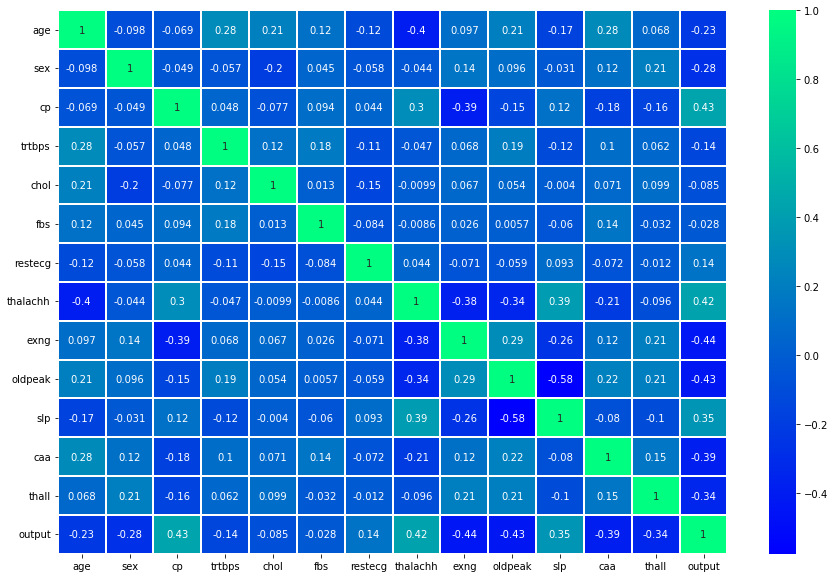

<Figure size 432x288 with 0 Axes>

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

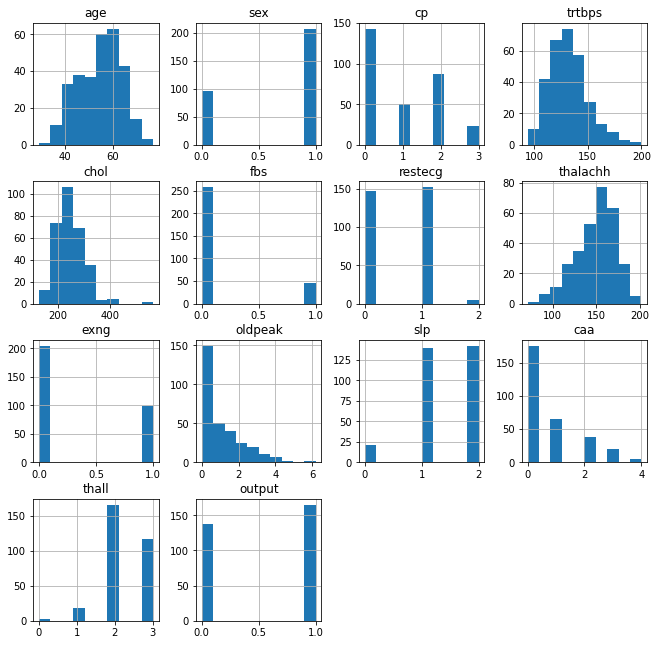

In [5]:
df.hist(figsize=(11,11))
plt.savefig('featuresplot')

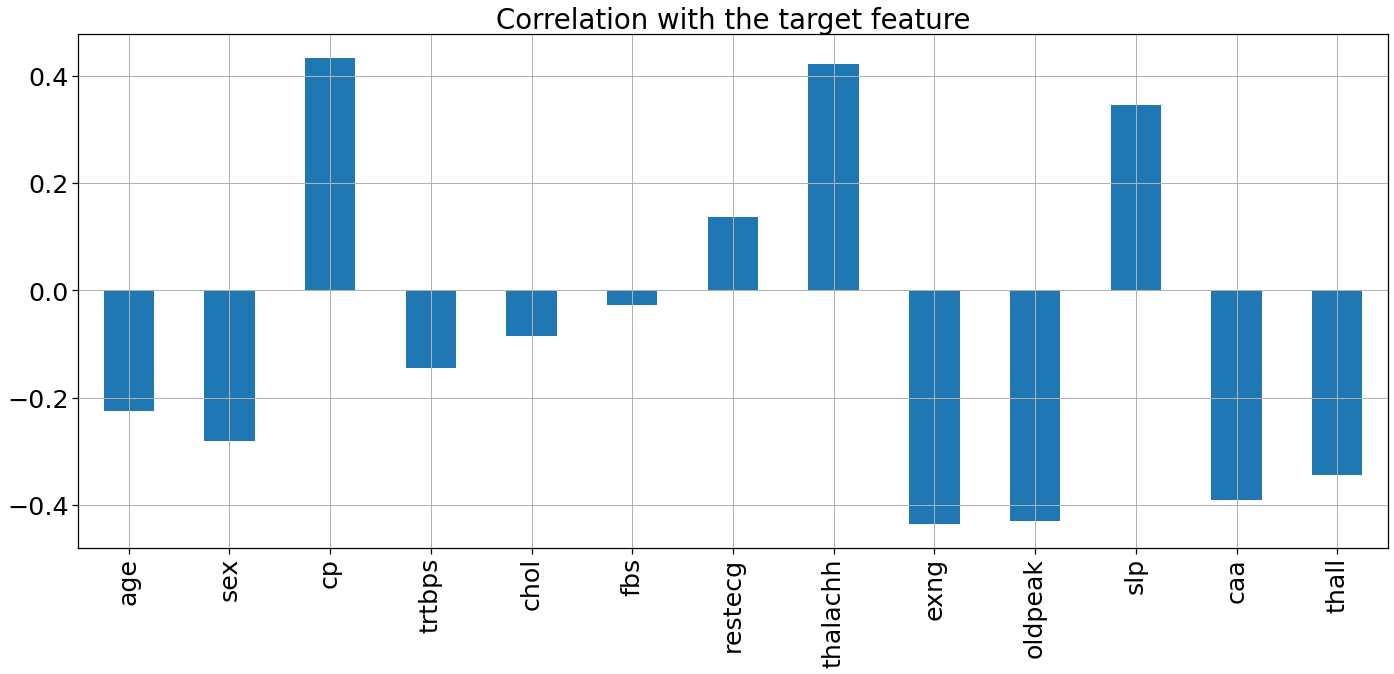

In [6]:
import seaborn as sns
sns.set_context('notebook',font_scale = 2.3)
df.drop('output', axis=1).corrwith(df.output).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [7]:
X=df.iloc[:,0:13].values
y=df['output'].values
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=40)

Testing Accuracy for Logistic Regression: 0.89
Testing Sensitivity for Logistic Regression: 0.8863636363636364
Testing Specificity for Logistic Regression: 0.8928571428571429
Testing Precision for Logistic Regression: 0.8666666666666667


C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


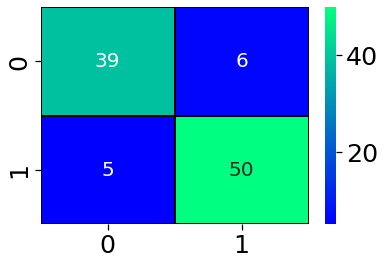

In [8]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       0.89      0.91      0.90        55

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



              precision    recall  f1-score   support

           0       1.00      0.91      0.95        45
           1       0.93      1.00      0.96        55

    accuracy                           0.96       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

Testing Accuracy for Decision Tree: 0.96
Testing Sensitivity for Decision Tree: 1.0
Testing Specificity for Decision Tree: 0.9322033898305084
Testing Precision for Decision Tree: 0.9111111111111111


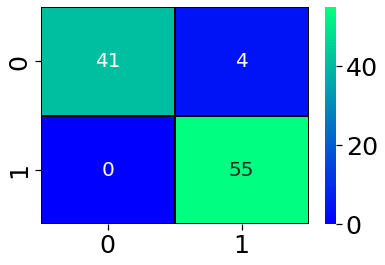

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

85.0
Testing Accuracy for Random Forest: 0.85
Testing Sensitivity for Random Forest: 0.8409090909090909
Testing Specificity for Random Forest: 0.8571428571428571
Testing Precision for Random Forest: 0.8222222222222222


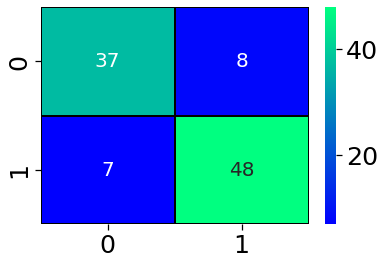

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

Testing Accuracy for SVM: 0.88
Testing Sensitivity for Random Forest: 0.8837209302325582
Testing Specificity for Random Forest: 0.8771929824561403
Testing Precision for Random Forest: 0.8444444444444444


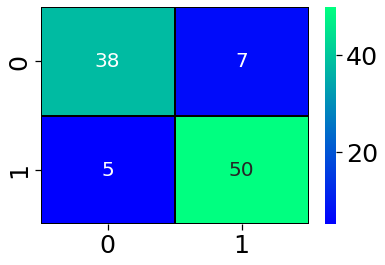

In [12]:
  from sklearn.svm import SVC
  svm=SVC(C=12,kernel='linear')
  model4=svm.fit(X_train,y_train)
  prediction4=model4.predict(X_test)
  cm4= confusion_matrix(y_test,prediction4)
  sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
  TP=cm4[0][0]
  TN=cm4[1][1]
  FN=cm4[1][0]
  FP=cm4[0][1]
  
  print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
  print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
  print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
  print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [13]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
from sklearn.neighbors import KNeighborsClassifier


Minimum error:- 0.13157894736842105 at K = 7


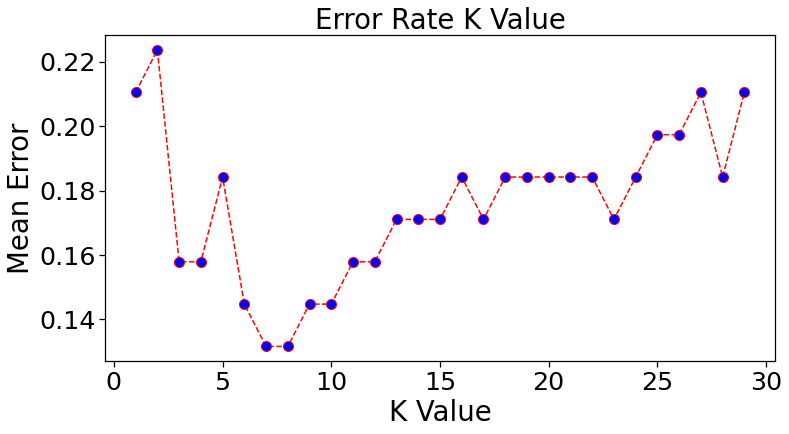

In [14]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [15]:
classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test) 
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[26  7]
 [ 3 40]]


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.868421052631579

In [17]:
from sklearn import model_selection

X = np.array(df.drop(['output'], 1))
y = np.array(df['output'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

C:\Users\Dell\AppData\Local\Temp/ipykernel_12604/146395251.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['output'], 1))


In [18]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________
None


C:\ANACONDA\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=2160, batch_size=8, verbose = 1)

Epoch 1/2160
31/31 [==============================] - 1s 2ms/step - loss: 0.7235 - accuracy: 0.5083
Epoch 2/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6405
Epoch 3/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6281
Epoch 4/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.7025
Epoch 5/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.6818
Epoch 6/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.6901
Epoch 7/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.6983
Epoch 8/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.7025
Epoch 9/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.7025
Epoch 10/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7231

31/31 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8347
Epoch 83/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8264
Epoch 84/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8512
Epoch 85/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8264
Epoch 86/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8554
Epoch 87/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8264
Epoch 88/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8347
Epoch 89/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8430
Epoch 90/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8306
Epoch 91/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8471
Epoc

31/31 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8554
Epoch 163/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 0.8471
Epoch 164/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8595
Epoch 165/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8471
Epoch 166/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.8347
Epoch 167/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8471
Epoch 168/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8388
Epoch 169/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8471
Epoch 170/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8595
Epoch 171/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.

31/31 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8636
Epoch 243/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.8554
Epoch 244/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8347
Epoch 245/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.8554
Epoch 246/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8554
Epoch 247/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3534 - accuracy: 0.8471
Epoch 248/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8223
Epoch 249/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8471
Epoch 250/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8512
Epoch 251/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.

31/31 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8554
Epoch 323/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.8471
Epoch 324/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8430
Epoch 325/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8554
Epoch 326/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8554
Epoch 327/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8512
Epoch 328/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8512
Epoch 329/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8595
Epoch 330/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8471
Epoch 331/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.

31/31 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8347
Epoch 403/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3309 - accuracy: 0.8430
Epoch 404/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3309 - accuracy: 0.8430
Epoch 405/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3365 - accuracy: 0.8554
Epoch 406/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8595
Epoch 407/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8430
Epoch 408/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8595
Epoch 409/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.8512
Epoch 410/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8512
Epoch 411/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3411 - accuracy: 0.

31/31 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.8595
Epoch 483/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8512
Epoch 484/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8471
Epoch 485/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.8471
Epoch 486/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8512
Epoch 487/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8554
Epoch 488/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3255 - accuracy: 0.8430
Epoch 489/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8388
Epoch 490/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3266 - accuracy: 0.8512
Epoch 491/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.

31/31 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8678
Epoch 563/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8636
Epoch 564/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3170 - accuracy: 0.8719
Epoch 565/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.8595
Epoch 566/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8760
Epoch 567/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8636
Epoch 568/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3205 - accuracy: 0.8719
Epoch 569/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3135 - accuracy: 0.8678
Epoch 570/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3080 - accuracy: 0.8512
Epoch 571/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.

31/31 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.8719
Epoch 643/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3085 - accuracy: 0.8678
Epoch 644/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8802
Epoch 645/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3238 - accuracy: 0.8554
Epoch 646/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8636
Epoch 647/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.8719
Epoch 648/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8554
Epoch 649/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8719
Epoch 650/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3271 - accuracy: 0.8678
Epoch 651/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.

31/31 [==============================] - 0s 1ms/step - loss: 0.3021 - accuracy: 0.8760
Epoch 723/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.8843
Epoch 724/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2961 - accuracy: 0.8719
Epoch 725/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8512
Epoch 726/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.8182
Epoch 727/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.8719
Epoch 728/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.8719
Epoch 729/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2979 - accuracy: 0.8595
Epoch 730/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.8926
Epoch 731/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2965 - accuracy: 0.

31/31 [==============================] - 0s 1ms/step - loss: 0.2895 - accuracy: 0.8843
Epoch 803/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3228 - accuracy: 0.8719
Epoch 804/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.8760
Epoch 805/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2961 - accuracy: 0.8719
Epoch 806/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3211 - accuracy: 0.8512
Epoch 807/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.8678
Epoch 808/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.8678
Epoch 809/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2950 - accuracy: 0.8678
Epoch 810/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2896 - accuracy: 0.8719
Epoch 811/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.

31/31 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.8595
Epoch 883/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3182 - accuracy: 0.8554
Epoch 884/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.8884
Epoch 885/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.8760
Epoch 886/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2852 - accuracy: 0.8760
Epoch 887/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2996 - accuracy: 0.8595
Epoch 888/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2825 - accuracy: 0.8760
Epoch 889/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2769 - accuracy: 0.8719
Epoch 890/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.8884
Epoch 891/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2752 - accuracy: 0.

31/31 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8554
Epoch 963/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.8760
Epoch 964/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.8802
Epoch 965/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8595
Epoch 966/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2844 - accuracy: 0.8636
Epoch 967/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.8843
Epoch 968/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2895 - accuracy: 0.8843
Epoch 969/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.8678
Epoch 970/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.8926
Epoch 971/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.

31/31 [==============================] - 0s 1ms/step - loss: 0.2942 - accuracy: 0.8512
Epoch 1043/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2779 - accuracy: 0.8760
Epoch 1044/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.8678
Epoch 1045/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.8678
Epoch 1046/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.8802
Epoch 1047/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2941 - accuracy: 0.8719
Epoch 1048/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8719
Epoch 1049/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3040 - accuracy: 0.8595
Epoch 1050/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8595
Epoch 1051/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3070 - acc

31/31 [==============================] - 0s 1ms/step - loss: 0.3025 - accuracy: 0.8554
Epoch 1122/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2738 - accuracy: 0.8884
Epoch 1123/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2934 - accuracy: 0.8595
Epoch 1124/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.8760
Epoch 1125/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.8719
Epoch 1126/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2821 - accuracy: 0.8678
Epoch 1127/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2809 - accuracy: 0.8760
Epoch 1128/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2855 - accuracy: 0.8678
Epoch 1129/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2779 - accuracy: 0.8802
Epoch 1130/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2806 - acc

31/31 [==============================] - 0s 1ms/step - loss: 0.2633 - accuracy: 0.8760
Epoch 1201/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.8678
Epoch 1202/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2851 - accuracy: 0.8719
Epoch 1203/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.8636
Epoch 1204/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.9008
Epoch 1205/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.8760
Epoch 1206/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2686 - accuracy: 0.8760
Epoch 1207/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.8884
Epoch 1208/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.8843
Epoch 1209/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2750 - acc

31/31 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.8802
Epoch 1280/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2842 - accuracy: 0.8595
Epoch 1281/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2637 - accuracy: 0.8760
Epoch 1282/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2693 - accuracy: 0.8678
Epoch 1283/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2624 - accuracy: 0.8802
Epoch 1284/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2896 - accuracy: 0.8802
Epoch 1285/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.8678
Epoch 1286/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2699 - accuracy: 0.8926
Epoch 1287/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.8760
Epoch 1288/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2617 - acc

31/31 [==============================] - 0s 1ms/step - loss: 0.2747 - accuracy: 0.8760
Epoch 1359/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.8884
Epoch 1360/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2599 - accuracy: 0.8926
Epoch 1361/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2588 - accuracy: 0.8884
Epoch 1362/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.8678
Epoch 1363/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.8884
Epoch 1364/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.8802
Epoch 1365/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.8802
Epoch 1366/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8430
Epoch 1367/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2844 - acc

31/31 [==============================] - 0s 1ms/step - loss: 0.2876 - accuracy: 0.8719
Epoch 1438/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2602 - accuracy: 0.8678
Epoch 1439/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 0.8843
Epoch 1440/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.8719
Epoch 1441/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8843
Epoch 1442/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2859 - accuracy: 0.8719
Epoch 1443/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.8512
Epoch 1444/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2736 - accuracy: 0.8884
Epoch 1445/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.8926
Epoch 1446/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2611 - acc

31/31 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.8760
Epoch 1517/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.8719
Epoch 1518/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2580 - accuracy: 0.8843
Epoch 1519/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8926
Epoch 1520/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2550 - accuracy: 0.8926
Epoch 1521/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.8719
Epoch 1522/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.8802
Epoch 1523/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2697 - accuracy: 0.8760
Epoch 1524/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.8719
Epoch 1525/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2568 - acc

31/31 [==============================] - 0s 1ms/step - loss: 0.2715 - accuracy: 0.8843
Epoch 1596/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2584 - accuracy: 0.8884
Epoch 1597/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2639 - accuracy: 0.8719
Epoch 1598/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2713 - accuracy: 0.8636
Epoch 1599/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2494 - accuracy: 0.8802
Epoch 1600/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2543 - accuracy: 0.8843
Epoch 1601/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.8719
Epoch 1602/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2674 - accuracy: 0.8760
Epoch 1603/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.8636
Epoch 1604/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2621 - acc

31/31 [==============================] - 0s 2ms/step - loss: 0.2563 - accuracy: 0.8843
Epoch 1675/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2684 - accuracy: 0.8719
Epoch 1676/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.8926
Epoch 1677/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.8843
Epoch 1678/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2788 - accuracy: 0.8802
Epoch 1679/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.8843
Epoch 1680/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8471
Epoch 1681/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.8843
Epoch 1682/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2514 - accuracy: 0.8926
Epoch 1683/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2616 - acc

31/31 [==============================] - 0s 1ms/step - loss: 0.2521 - accuracy: 0.9008
Epoch 1754/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2879 - accuracy: 0.8595
Epoch 1755/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2491 - accuracy: 0.8884
Epoch 1756/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.8884
Epoch 1757/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2641 - accuracy: 0.8802
Epoch 1758/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2633 - accuracy: 0.8802
Epoch 1759/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2537 - accuracy: 0.8843
Epoch 1760/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2568 - accuracy: 0.8884
Epoch 1761/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.8719
Epoch 1762/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2984 - acc

31/31 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.8884
Epoch 1833/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.8843
Epoch 1834/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.8678
Epoch 1835/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.8884
Epoch 1836/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8843
Epoch 1837/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.8843
Epoch 1838/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2700 - accuracy: 0.8760
Epoch 1839/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2563 - accuracy: 0.8760
Epoch 1840/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.8967
Epoch 1841/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2645 - acc

31/31 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.8595
Epoch 1912/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2615 - accuracy: 0.8843
Epoch 1913/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2616 - accuracy: 0.8843
Epoch 1914/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2658 - accuracy: 0.8636
Epoch 1915/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2610 - accuracy: 0.8843
Epoch 1916/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2515 - accuracy: 0.8967
Epoch 1917/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2462 - accuracy: 0.8884
Epoch 1918/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.8884
Epoch 1919/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.8884
Epoch 1920/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2645 - acc

31/31 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.8554
Epoch 1991/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2573 - accuracy: 0.8884
Epoch 1992/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2539 - accuracy: 0.8926
Epoch 1993/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2441 - accuracy: 0.8843
Epoch 1994/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.8926
Epoch 1995/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2508 - accuracy: 0.8843
Epoch 1996/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2485 - accuracy: 0.8760
Epoch 1997/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8926
Epoch 1998/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.8926
Epoch 1999/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2650 - acc

31/31 [==============================] - 0s 2ms/step - loss: 0.2530 - accuracy: 0.8802
Epoch 2070/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.8884
Epoch 2071/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.8884
Epoch 2072/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.8843
Epoch 2073/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2553 - accuracy: 0.8843
Epoch 2074/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2429 - accuracy: 0.8802
Epoch 2075/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2639 - accuracy: 0.8760
Epoch 2076/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.8884
Epoch 2077/2160
31/31 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.8802
Epoch 2078/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2432 - acc

31/31 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.8843
Epoch 2149/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2423 - accuracy: 0.8967
Epoch 2150/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2418 - accuracy: 0.8843
Epoch 2151/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.8595
Epoch 2152/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2727 - accuracy: 0.8678
Epoch 2153/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2524 - accuracy: 0.8843
Epoch 2154/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2464 - accuracy: 0.8884
Epoch 2155/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2664 - accuracy: 0.8802
Epoch 2156/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2565 - accuracy: 0.8843
Epoch 2157/2160
31/31 [==============================] - 0s 1ms/step - loss: 0.2538 - acc

order to be followed:-"age	sex	cp	trtbps	chol	fbs	restecg	thalachh	exng	oldpeak	slp	caa	thall	output"
age in years
sex (1 = male; 0 = female)
chest pain type (4 values-0 to 3 wrt to pain level )
trtbps (resting blood pressure (in mm Hg on admission to the hospital)
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl - TRUE OR FALSE
resting electrocardiographic results (values 0,1,2)
thalachh (maximum heart rate achieved)
exercise induced angina  (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [21]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 [==============================] - 0s 3ms/step
Results for Categorical Model
0.8360655737704918
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [22]:
import numpy as np 
input=[63,1,3,145,175,1,0,21,0,2.4,0,0,1]
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be Normal:)


In [30]:
inputx=pd.read_csv('input.csv')
rr=inputx.to_numpy()
newarr = rr.reshape(1,13)
print(newarr)
pre1=tree_model.predict(newarr)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

[[1.0000e+00 1.1000e+01 1.1000e+01 1.1100e+02 1.1000e+01 1.0000e+00
  1.0000e+00 1.1100e+02 1.1000e+01 1.1100e+02 1.1800e+02 1.2340e+03
  1.3245e+04]]
The patient seems to be Normal:)


In [31]:
inputx=pd.read_csv('input.csv')
rr=inputx.to_numpy()
newarr = rr.reshape(1,13)
print(newarr)
pre1=tree_model.predict(newarr)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

[[1.0000e+00 1.1000e+01 1.1000e+01 1.1100e+02 1.1000e+01 1.0000e+00
  1.0000e+00 1.1100e+02 1.1000e+01 1.1100e+02 1.1800e+02 1.2340e+03
  1.3245e+04]]
The patient seems to be Normal:)


In [32]:
inputx=pd.read_csv('input.csv')
rr=inputx.to_numpy()
newarr = rr.reshape(1,13)
print(newarr)
pre1=model.predict(newarr)
print(pre1)
pre1.reshape(2,1)
if(pre1[0][0]>.50):
    print("The patient seems to be Normal:)")
else:
    print("The patient seems to be have heart disease:(")

[[1.0000e+00 1.1000e+01 1.1000e+01 1.1100e+02 1.1000e+01 1.0000e+00
  1.0000e+00 1.1100e+02 1.1000e+01 1.1100e+02 1.1800e+02 1.2340e+03
  1.3245e+04]]
1/1 [==============================] - 0s 20ms/step
[[1. 0.]]
The patient seems to be Normal:)


In [29]:
df=[1,1,1,1,1,1,1,1,1,1,1,1,1]
rr= np.array(df, dtype=np.float32)
newarr = rr.reshape(1,13)
print(newarr)
pre1=model.predict(newarr)
print(pre1)
pre1.reshape(2,1)
if(pre1[0][0]>.50):
    print("The patient seems to be Normal:)")
else:
    print("The patient seems to be have heart disease:(")

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
1/1 [==============================] - 0s 21ms/step
[[0.44876063 0.55123943]]
The patient seems to be have heart disease:(
